In [75]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import os

In [2]:
data=yf.download('RR.L',start='2021-11-17',end='2023-11-17')

[*********************100%%**********************]  1 of 1 completed


# Rolls Royce

In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-17,142.800003,144.240005,140.440002,140.440002,140.440002,19933194
2021-11-18,140.399994,142.580002,138.000000,141.479996,141.479996,17084798
2021-11-19,142.259995,142.660004,132.503998,136.000000,136.000000,74157325
2021-11-22,136.320007,139.740005,134.279999,135.820007,135.820007,26956818
2021-11-23,134.779999,138.580002,134.220001,135.860001,135.860001,17563491


In [4]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-10,230.500000,233.699997,229.300003,232.000000,232.000000,21326926
2023-11-13,232.699997,240.199997,232.500000,240.199997,240.199997,37517924
2023-11-14,237.699997,241.699997,230.100006,239.000000,239.000000,49856814
2023-11-15,239.399994,244.100006,238.000000,243.600006,243.600006,25027311
2023-11-16,243.714005,246.899994,240.899994,244.500000,244.500000,98375507


In [5]:
S = data['Adj Close'][-1]
print('The spot price is', round(S,2))

The spot price is 244.5


# Descriptive Analysis of Rolls Royce's Adjusted Close

In [10]:
data.describe().round(2)

,Open,High,Low,Close,Adj Close,Volume
count,503.00,503.00,503.00,503.00,503.00,5.030000e+02
mean,125.92,128.47,123.84,126.07,126.07,3.867209e+07
std,45.88,46.66,45.50,46.14,46.14,2.638197e+07
min,65.71,68.43,64.44,66.24,66.24,5.261705e+06
25%,88.35,90.27,86.85,88.44,88.44,2.292752e+07
50%,113.00,115.21,111.52,113.02,113.02,3.144244e+07
75%,150.38,152.81,148.42,150.35,150.35,4.620596e+07
max,243.71,246.90,240.90,244.50,244.50,2.716131e+08


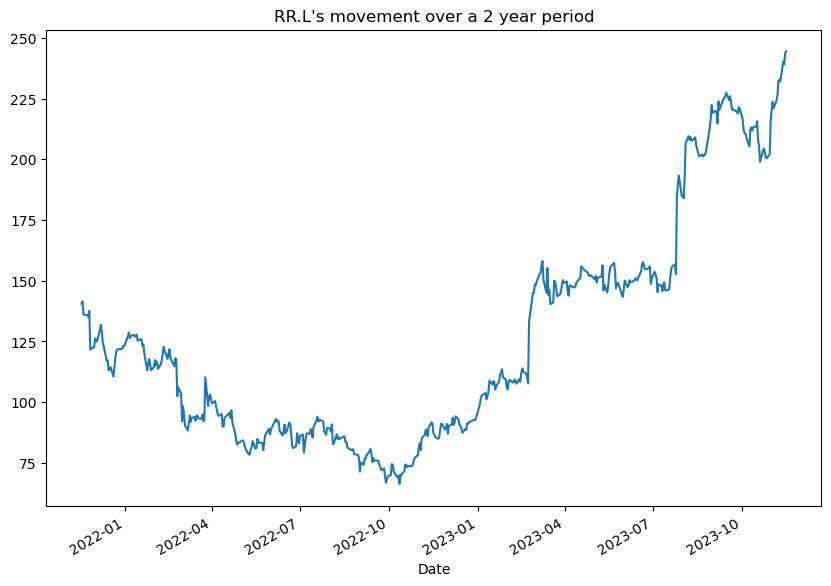

In [14]:
data['Adj Close'].plot(figsize=(10,7))
plt.title("RR.L's movement over a 2 year period")
plt.show()

In [15]:
data['Daily_Return'] = data['Close'].pct_change()

In [17]:
avg_return = data['Daily_Return'].mean() * 252  # Assuming 252 trading days in a year
std_dev = data['Daily_Return'].std() * (252 ** 0.5)

print(f"Annualized Average Return: {avg_return:.2%}")
print(f"Annualized Standard Deviation: {std_dev:.2%}")


Annualized Average Return: 39.82%
Annualized Standard Deviation: 49.59%


Text(0.5, 1.0, 'Log Return')

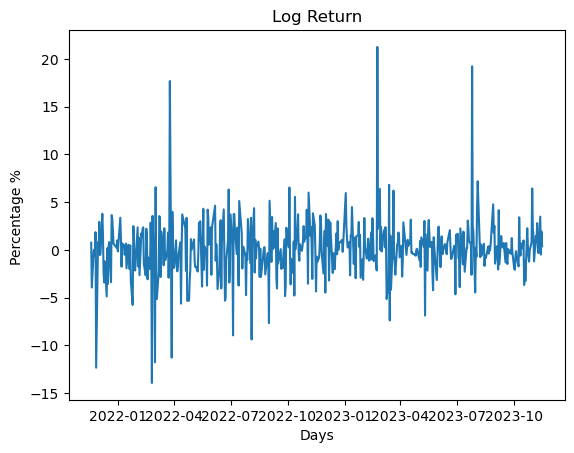

In [18]:
fig = plt.figure()
plt.plot(log_return * 100)
plt.xlabel('Days')
plt.ylabel('Percentage % ')
plt.title('Log Return')

# Binomial Tree 

In [90]:
S0 =244.5             # spot price = 244.5
K = 251.83            # strike price
T = 2                 # maturity
r = 0.05              # risk free rate 
sig = 0.4959             # volatility
N = 3                 # number of periods or number of time steps  
payoff = "put"        # payoff 

print(S0)

244.5


In [25]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor 

S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [26]:
print('The up factor u is ',(u))

The up factor u is  1.4885476843176841


In [30]:
print('The down factor d is',(d))

The down factor d is 0.6717957446276751


In [32]:
print('The binomial tree presenting Rolls Royce price over 3 time steps ', '\n', (S))

The binomial tree presenting Rolls Royce price over 3 time steps  
 [[244.5        363.94990882 541.75679398 806.43082114]
 [  0.         164.25405956 244.5        363.94990882]
 [  0.           0.         110.34517825 164.25405956]
 [  0.           0.           0.          74.12942119]]


In [33]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.44334069047124713

In [34]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,  87.57594044],
       [  0.        ,   0.        ,   0.        , 177.70057881]])

In [35]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[ 60.39324695,  25.38696577,   0.        ,   0.        ],
       [  0.        ,  91.95069066,  47.15174866,   0.        ],
       [  0.        ,   0.        , 133.22885233,  87.57594044],
       [  0.        ,   0.        ,   0.        , 177.70057881]])

In [36]:
print('European ' + payoff, str( V[0,0]))

European put 60.39324694526792


# Monte Carlo Simulation

In [64]:
def mcs_simulation_np(m):       #m is the number of steps
    M = m
    I = m
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sig ** 2 / 2) * dt + sig * np.sqrt(dt) * rn[t]) 
    return S

In [65]:
S2 = mcs_simulation_np(1000)

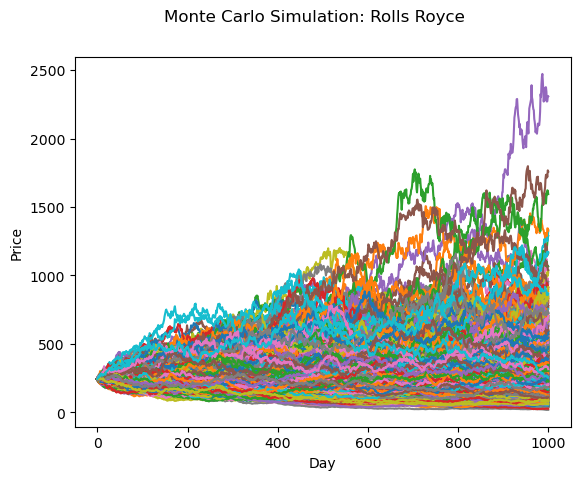

In [67]:
fig = plt.figure()
plt.plot(S2)
fig.suptitle('Monte Carlo Simulation: Rolls Royce')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-period values')

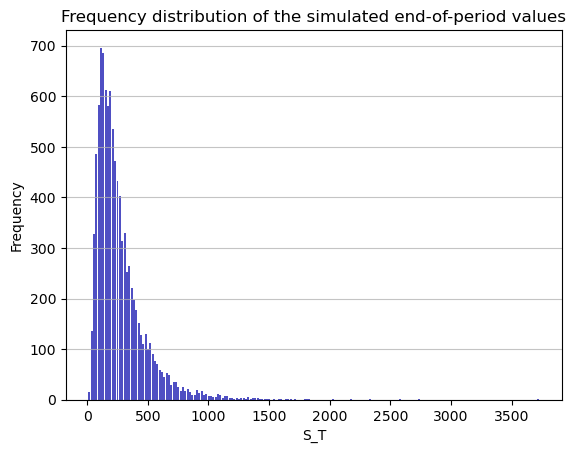

In [69]:
n, bins, patches = plt.hist(x=S[-1,:], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-period values')

In [70]:
put = np.mean(np.maximum(K - S2[:,-1],0))
print('Monte Carlo Simulation & Option price - European put', str(put))

Monte Carlo Simulation & Option price - European put 0.009040155130704549


# Black Scholes Merton Model

In [71]:
def euro_option_bs(S0, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [78]:
euro_option_bs(S0, K, T, r, vol, 'put')
print('The BS put price is', round(put, 2))

55.661312167757174

# Delta 

In [97]:
import numpy as np
from scipy.stats import norm

In [98]:
def delta(S, K, T, r, q, vol, payoff): # q = dividend = 0 
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [96]:
delta(S, K, T, r, 0, vol, 'put')

array([[-0.32752068, -0.32752068, -0.32752068, ..., -0.32752068,
        -0.32752068, -0.32752068],
       [-0.32819576, -0.32423759, -0.32271408, ..., -0.32334251,
        -0.3314087 , -0.33061126],
       [-0.32939904, -0.32039888, -0.32647635, ..., -0.3209793 ,
        -0.32454554, -0.33074279],
       ...,
       [-0.87542041, -0.12153711, -0.70705049, ..., -0.39356703,
        -0.74091139, -0.68393513],
       [-0.8736732 , -0.12045338, -0.70619367, ..., -0.39010249,
        -0.73515527, -0.68430013],
       [-0.87383914, -0.12206184, -0.70933088, ..., -0.38195994,
        -0.73698693, -0.68926888]])

In [99]:
S11 = np.linspace(240,500,100)
Delta_Call = np.zeros((len(S11),1))
Delta_Put = np.zeros((len(S11),1))
for i in range(len(S11)):
    Delta_Put [i] = delta(S11[i], K, T, r, 0, vol, 'put')

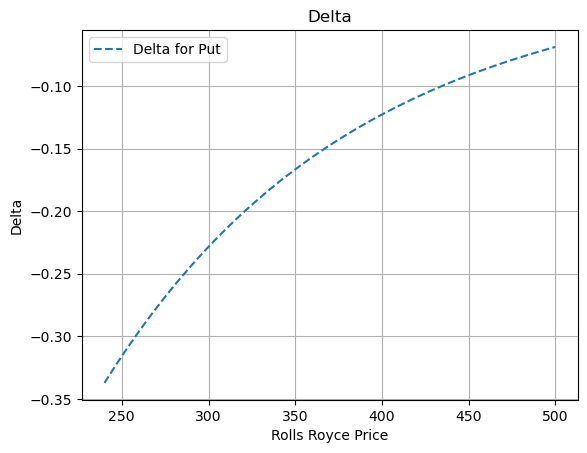

In [100]:
fig = plt.figure()

plt.plot(S11, Delta_Put, '--')
plt.grid()
plt.xlabel('Rolls Royce Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Put'])

# Gamma

In [111]:
import numpy as np
from scipy.stats import norm

In [112]:
def gamma(S, K, T, r, q, vol, payoff):      #q = dividend = 0
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [125]:
gamma(244.5,251.83,2,0.05,0, 0.4959,'put')

0.0021015011211440206

In [133]:
S = np.linspace(240,500,100)
Gamma = np.zeros((len(S),2))
for i in range(len(S)):
    Gamma [i] = gamma(S[i],251.83, 2,0, 0.05, 0.4959, 'put')

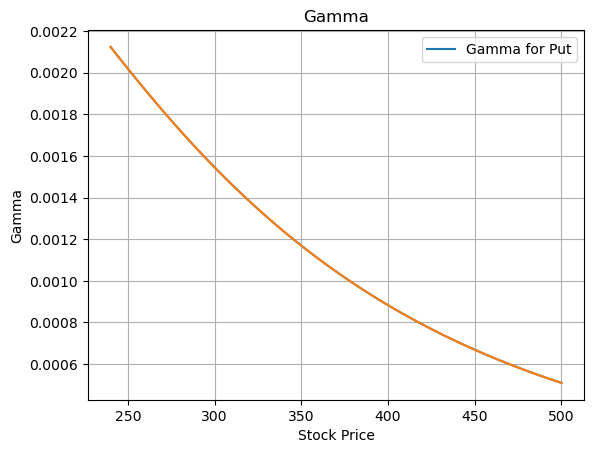

In [134]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Put'])

# Vega

In [135]:
def vega(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    N_d1_prime=1/np.sqrt(2 * np.pi) * np.exp(-d1**2/2)
    vega = S * np.sqrt(T) * N_d1_prime
    
    return vega

In [137]:
vega(244.5,251.83,2,0.05,0.4959,'put')

124.59811064561224

In [143]:
vol = np.linspace(0.1,0.6,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(244.5,251.83,2,0.05, vol[i], 'put')

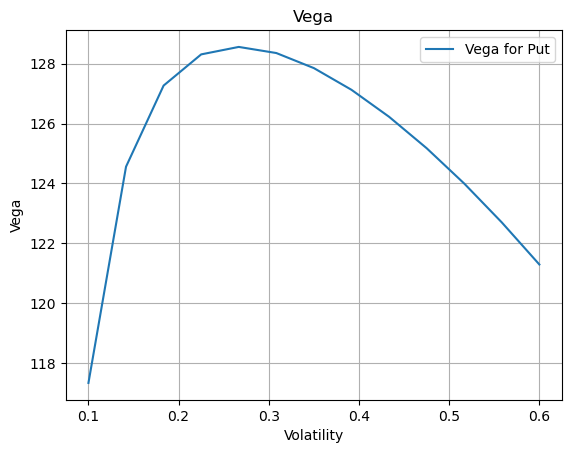

In [144]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Put'])

# Theta

In [141]:
def theta(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    N_d1_prime=1/np.sqrt(2 * np.pi) * np.exp(-d1**2/2)
    
    if payoff == "call":
        theta = - S * N_d1_prime * vol / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = - S * N_d1_prime * vol / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [142]:
theta(244.5,251.83,2,0.05,0.4959,'put')

-8.62502572070202

In [145]:
T = np.linspace(0.25,3,12)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Put [i] = theta(244.5,251.83, T[i], 0.05, 0.25, 'put')

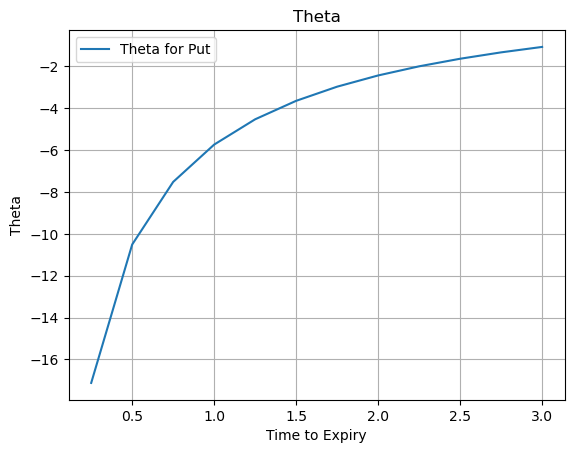

In [147]:
fig = plt.figure()
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Put'])